In [2]:
from keras.datasets import imdb 
from keras.preprocessing import sequence

In [3]:
max_features = 10000 
maxlen = 500 
batch_size = 32 

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words = 10000)

17473536/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

In [4]:
len(input_train[0])

218

In [5]:
len(input_train[1])

189

In [6]:
input_train = sequence.pad_sequences(input_train, maxlen=500)
input_test = sequence.pad_sequences(input_test, maxlen=500)

In [7]:
from keras.layers import Dense, Embedding, SimpleRNN, LSTM
from keras.models import Sequential

model = Sequential() 
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', 
              metrics=['acc'])
history = model.fit(input_train, y_train, 
                    epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 83s 403ms/step - loss: 0.6841 - acc: 0.5385 - val_loss: 0.4889 - val_acc: 0.7818
Epoch 2/10
157/157 [==============================] - 64s 405ms/step - loss: 0.4585 - acc: 0.7957 - val_loss: 0.4910 - val_acc: 0.7666
Epoch 3/10
157/157 [==============================] - 64s 405ms/step - loss: 0.3163 - acc: 0.8767 - val_loss: 0.3750 - val_acc: 0.8422
Epoch 4/10
157/157 [==============================] - 62s 394ms/step - loss: 0.2161 - acc: 0.9180 - val_loss: 0.4654 - val_acc: 0.7964
Epoch 5/10
157/157 [==============================] - 61s 391ms/step - loss: 0.1496 - acc: 0.9501 - val_loss: 0.4383 - val_acc: 0.8258
Epoch 6/10
157/157 [==============================] - 61s 391ms/step - loss: 0.0842 - acc: 0.9732 - val_loss: 0.4976 - val_acc: 0.8136
Epoch 7/10
157/157 [==============================] - 62s 392ms/step - loss: 0.0509 - acc: 0.9849 - val_loss: 0.5500 - val_acc: 0.8250
Epoch 8/10
157/157 [==============================] - 6

In [9]:
model = Sequential() 
model.add(Embedding(10000, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', 
              metrics=['acc'])
history = model.fit(input_train, y_train, 
                    epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10


KeyboardInterrupt: ignored

In [9]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

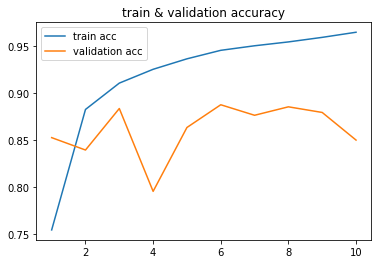

In [10]:
import matplotlib.pyplot as plt

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='train acc')
plt.plot(epochs, val_acc, label='validation acc')
plt.title('train & validation accuracy')
plt.legend() 
plt.show()

In [11]:
model = Sequential() 
model.add(Embedding(10000, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', 
              metrics=['acc'])
history = model.fit(input_train, y_train, 
                    epochs=3, batch_size=128, validation_split=0.2)

Epoch 1/3
157/157 [==============================] - 6s 28ms/step - loss: 0.5972 - acc: 0.6752 - val_loss: 0.3377 - val_acc: 0.8680
Epoch 2/3
157/157 [==============================] - 4s 24ms/step - loss: 0.3135 - acc: 0.8775 - val_loss: 0.3154 - val_acc: 0.8764
Epoch 3/3
157/157 [==============================] - 4s 24ms/step - loss: 0.2337 - acc: 0.9138 - val_loss: 0.2963 - val_acc: 0.8902


### RNN 성능개선 

In [10]:
model = Sequential() 
model.add(Embedding(10000, 32))
model.add(LSTM(32, dropout=0.1, recurrent_dropout=0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', 
              metrics=['acc'])
history = model.fit(input_train, y_train, 
                    epochs=3, batch_size=128, validation_split=0.2)

Epoch 1/3
157/157 [==============================] - 431s 3s/step - loss: 0.6186 - acc: 0.6698 - val_loss: 0.4268 - val_acc: 0.8058
Epoch 2/3
157/157 [==============================] - 411s 3s/step - loss: 0.3462 - acc: 0.8660 - val_loss: 0.3514 - val_acc: 0.8530
Epoch 3/3
157/157 [==============================] - 408s 3s/step - loss: 0.2685 - acc: 0.8976 - val_loss: 0.3722 - val_acc: 0.8704


### Stacked RNN

In [12]:
model = Sequential() 
model.add(Embedding(10000, 32))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', 
              metrics=['acc'])
history = model.fit(input_train, y_train, 
                    epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 79s 459ms/step - loss: 0.5652 - acc: 0.6925 - val_loss: 0.3823 - val_acc: 0.8442
Epoch 2/10
157/157 [==============================] - 70s 449ms/step - loss: 0.2926 - acc: 0.8884 - val_loss: 0.6062 - val_acc: 0.7478
Epoch 3/10
157/157 [==============================] - 70s 449ms/step - loss: 0.2441 - acc: 0.9107 - val_loss: 0.3016 - val_acc: 0.8764
Epoch 4/10
157/157 [==============================] - 70s 448ms/step - loss: 0.2043 - acc: 0.9262 - val_loss: 0.3496 - val_acc: 0.8836
Epoch 5/10
157/157 [==============================] - 70s 446ms/step - loss: 0.1711 - acc: 0.9375 - val_loss: 0.4934 - val_acc: 0.8206
Epoch 6/10
157/157 [==============================] - 70s 446ms/step - loss: 0.1654 - acc: 0.9402 - val_loss: 0.5693 - val_acc: 0.8350
Epoch 7/10
157/157 [==============================] - 70s 446ms/step - loss: 0.1429 - acc: 0.9513 - val_loss: 0.3475 - val_acc: 0.8632
Epoch 8/10
157/157 [==============================] - 7

In [13]:
from keras.layers import GRU 

model = Sequential() 
model.add(Embedding(10000, 32))
model.add(GRU(32, return_sequences=True))
model.add(GRU(32, return_sequences=True))
model.add(GRU(32, return_sequences=True))
model.add(GRU(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', 
              metrics=['acc'])
history = model.fit(input_train, y_train, 
                    epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 77s 439ms/step - loss: 0.6128 - acc: 0.6389 - val_loss: 0.4031 - val_acc: 0.8222
Epoch 2/10
157/157 [==============================] - 67s 430ms/step - loss: 0.3416 - acc: 0.8574 - val_loss: 0.3569 - val_acc: 0.8486
Epoch 3/10
157/157 [==============================] - 67s 430ms/step - loss: 0.2717 - acc: 0.8958 - val_loss: 0.4278 - val_acc: 0.8366
Epoch 4/10
157/157 [==============================] - 67s 429ms/step - loss: 0.2310 - acc: 0.9120 - val_loss: 0.3203 - val_acc: 0.8700
Epoch 5/10
157/157 [==============================] - 67s 428ms/step - loss: 0.2053 - acc: 0.9268 - val_loss: 0.4497 - val_acc: 0.8162
Epoch 6/10
157/157 [==============================] - 71s 451ms/step - loss: 0.1699 - acc: 0.9406 - val_loss: 0.3346 - val_acc: 0.8672
Epoch 7/10
157/157 [==============================] - 67s 429ms/step - loss: 0.1567 - acc: 0.9455 - val_loss: 0.3847 - val_acc: 0.8534
Epoch 8/10
157/157 [==============================] - 6

### StackedRNN + dropout

In [ ]:
from keras.layers import GRU 

model = Sequential() 
model.add(Embedding(10000, 32))
model.add(GRU(32, return_sequences=True, dropout=0.1, recurrent_dropout=0.2))
model.add(GRU(32, return_sequences=True, dropout=0.1, recurrent_dropout=0.2))
model.add(GRU(32, return_sequences=True, dropout=0.1, recurrent_dropout=0.2))
model.add(GRU(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', 
              metrics=['acc'])
history = model.fit(input_train, y_train, 
                    epochs=10, batch_size=128, validation_split=0.2)

### 양방향 RNN

In [16]:
from keras.layers import Bidirectional

model = Sequential() 
model.add(Embedding(10000, 32))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', 
              metrics=['acc'])
history = model.fit(input_train, y_train, 
                    epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 37s 198ms/step - loss: 0.6506 - acc: 0.6322 - val_loss: 0.4317 - val_acc: 0.8410
Epoch 2/10
157/157 [==============================] - 30s 192ms/step - loss: 0.3768 - acc: 0.8585 - val_loss: 0.3078 - val_acc: 0.8778
Epoch 3/10
157/157 [==============================] - 30s 192ms/step - loss: 0.2558 - acc: 0.9033 - val_loss: 0.2893 - val_acc: 0.8868
Epoch 4/10
157/157 [==============================] - 30s 192ms/step - loss: 0.2112 - acc: 0.9218 - val_loss: 0.2787 - val_acc: 0.8860
Epoch 5/10
157/157 [==============================] - 30s 192ms/step - loss: 0.1837 - acc: 0.9337 - val_loss: 0.3009 - val_acc: 0.8802
Epoch 6/10
157/157 [==============================] - 30s 191ms/step - loss: 0.1544 - acc: 0.9490 - val_loss: 0.2900 - val_acc: 0.8902
Epoch 7/10
157/157 [==============================] - 30s 192ms/step - loss: 0.1374 - acc: 0.9529 - val_loss: 0.3073 - val_acc: 0.8686
Epoch 8/10
157/157 [==============================] - 3